In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['date.converter'] = 'concise'

## 散点

In [2]:
with open('../data/global_temperature/small.txt', 'r') as f:
    data = np.genfromtxt(f, dtype='datetime64[s],f,f,f', 
                         names=['date', 'doy', 'temp', 'solar'])
datetime = data['date']
dayofyear = data['doy']
temperature = data['temp']
solar = data['solar']

# 两天平滑
temp_low = np.convolve(temperature, np.ones(48)/48, mode='same')
solar_low = np.convolve(solar, np.ones(48)/48, mode='same')

source = 'https://www.ncei.noaa.gov/pub/data/uscrn/products/hourly02'

In [3]:
df = pd.DataFrame(data={
    'datetime': datetime,
    'dayofyear': dayofyear,
    'temperature': temperature,
    'solar': solar,
    'temp_low': temp_low,
    'solar_low': solar_low
})
df

,datetime,dayofyear,temperature,solar,temp_low,solar_low
0,2018-01-01 01:00:00,0.042,1.6,0.0,-0.614583,33.250000
1,2018-01-01 02:00:00,0.083,0.4,0.0,-0.585417,33.250000
2,2018-01-01 03:00:00,0.125,0.2,0.0,-0.591667,33.250000
3,2018-01-01 04:00:00,0.167,-1.0,0.0,-0.608333,33.250000
4,2018-01-01 05:00:00,0.208,-1.2,0.0,-0.643750,33.250000
...,...,...,...,...,...,...
26299,2020-12-31 20:00:00,0.833,-9.4,97.0,-6.056250,16.500000
26300,2020-12-31 21:00:00,0.875,-8.7,100.0,-5.843750,13.937500
26301,2020-12-31 22:00:00,0.917,-8.8,48.0,-5.643750,11.541667
26302,2020-12-31 23:00:00,0.958,-8.6,18.0,-5.460417,9.666667


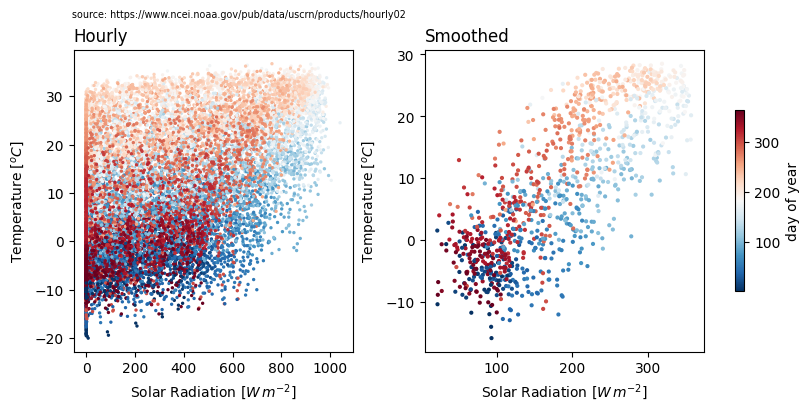

In [4]:
fig, [ax1, ax2] = plt.subplots(1, 2, constrained_layout=True, figsize=(8, 4))

sc = ax1.scatter(df.solar, df.temperature, c=df.dayofyear, s=2, cmap='RdBu_r')
ax1.set_xlabel('Solar Radiation $[W\,m^{-2}]$')
ax1.set_ylabel('Temperature $[^oC]$')
ax1.set_title('Hourly', loc='left')

sc = ax2.scatter(df.solar_low[::24], df.temp_low[::24], c=df.dayofyear[::24], s=4, cmap='RdBu_r')
ax2.set_xlabel('Solar Radiation $[W\,m^{-2}]$')
ax2.set_ylabel('Temperature $[^oC]$')
ax2.set_title('Smoothed', loc='left')

fig.colorbar(sc, ax=[ax1, ax2], shrink=0.6, label='day of year')
fig.suptitle(f'source: {source}', fontsize='x-small', ha='right')
plt.show()

## 全球一日

In [5]:
dat = np.genfromtxt('../data/global_temperature/MOD_LSTD_E_2021-08-29_gs_720x360.CSV', delimiter=',')
dat = np.where(dat<1000, dat, np.nan)
dat = dat[::-1, :]
lon = np.arange(-180.0, 180.1, 0.5)
lat = np.arange(-90.0, 90.1, 0.5)
date = '2021-08-29 to 2021-09-05'
source = 'https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MOD_LSTD_E&date=2021-09-01'

In [6]:
dat

array([[-25., -25., -25., ..., -25., -25., -25.],
       [-25., -25., -25., ..., -25., -25., -25.],
       [-25., -25., -25., ..., -25., -25., -25.],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [7]:
dat.shape  # (lat, lon)

(360, 720)

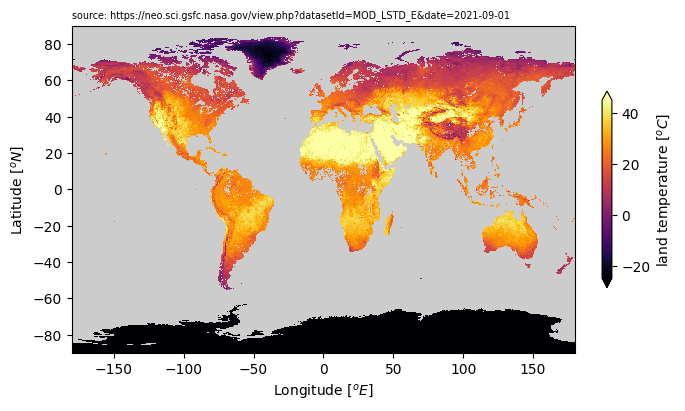

In [8]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 4))
ax.set_facecolor('0.8')
pc = ax.pcolormesh(lon, lat, dat, shading='auto', cmap='inferno')
ax.set_aspect(1.3)
ax.set_xlabel('Longitude $[^o E]$')
ax.set_ylabel('Latitude $[^o N]$')
fig.colorbar(pc, shrink=0.6, extend='both', label='land temperature $[^oC]$')
ax.set_title(f'source: {source}', loc='left', fontsize='x-small')
plt.show()

## 合并

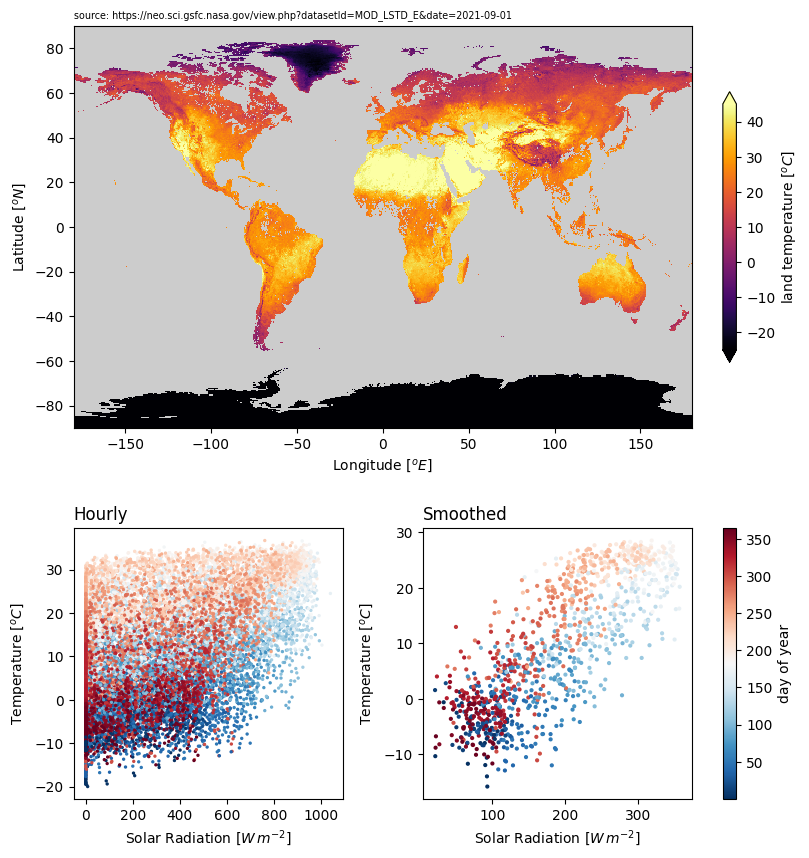

In [9]:
fig = plt.figure(figsize=(8, 9), constrained_layout=True)
# Plot 1
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=2)
ax1.set_facecolor('0.8')
pc = ax1.pcolormesh(lon, lat, dat, shading='auto', cmap='inferno')
ax1.set_aspect(1.3)
ax1.set_xlabel('Longitude $[^o E]$')
ax1.set_ylabel('Latitude $[^o N]$')
fig.colorbar(pc, shrink=0.5, extend='both', label='land temperature $[^oC]$')
ax1.set_title(f'source: {source}', loc='left', fontsize='x-small')

# Plot 2
ax2 = plt.subplot2grid((3, 2), (2, 0))
sc = ax2.scatter(df.solar, df.temperature, c=df.dayofyear, s=2, cmap='RdBu_r')
ax2.set_xlabel('Solar Radiation $[W\,m^{-2}]$')
ax2.set_ylabel('Temperature $[^oC]$')
ax2.set_title('Hourly', loc='left')

# Plot 3
ax3 = plt.subplot2grid((3, 2), (2, 1))
sc = ax3.scatter(df.solar_low[::24], df.temp_low[::24], c=df.dayofyear[::24], s=4, cmap='RdBu_r')
ax3.set_xlabel('Solar Radiation $[W\,m^{-2}]$')
ax3.set_ylabel('Temperature $[^oC]$')
ax3.set_title('Smoothed', loc='left')
fig.colorbar(sc, ax=[ax2, ax3], shrink=1, label='day of year')

plt.show()